In [1]:
import time
import numpy as np
import tensorflow as tf
import pandas as pd


from user import User
from average import Average
from tensorflow import keras

from graphing import *
from file_related import *
from inits import *
from trainers import *
SEED = 0

# import os
# os.environ['PYTHONHASHSEED']=str(SEED)
# np.random.seed(SEED)
# import random
# random.seed(SEED)
# tf.set_random_seed(SEED)
# could need to force keras to not use parallelism, see documentation

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# SEED = 0
df = read_file("../dataset/allUsers.lcl.csv")
df = shuffle_df(df, SEED)
averaging_methods = [Average.all,Average.std_dev,Average.weighted_avg]
# df.head()

In [3]:
DEVICE = '/cpu:0'
ROUNDS = 64 #64
EPOCHS = 16 # 16 is good
OUT_PATH = "../out/gesture"

In [ ]:
# forces tensorfor to the a particular device to run things
with tf.device(DEVICE):
#     averaging_methods = [Average.all]
#      # return a dictionary of users with data
    print("Regular")
    users_all, global_user = init_users(df = df, 
                                        averaging_methods = averaging_methods, 
                                        seed = SEED)
    train_fed(users = users_all, rounds = ROUNDS,
              epochs = EPOCHS,
              strat = "central",
              train_user_verbose = False,
              train_user_verbose_evaluate = False,
              train_user_verbose_fit = False,
              averaging_method = Average.all,
              averaging_post = True,
              averaging_metric = "accuracy")
    averaging_methods = [Average.std_dev]
    # return a dictionary of users with data
    print("avg - stddev")
    users_std_dev, global_user = init_users(df = df, 
                                        averaging_methods = averaging_methods, 
                                        seed = SEED)
    train_fed(users = users_std_dev, rounds = ROUNDS,
              epochs = EPOCHS,
              strat = "central",
              train_user_verbose = False,
              train_user_verbose_evaluate = False,
              train_user_verbose_fit = False,
              averaging_method =  Average.std_dev,
             averaging_post = True,
              averaging_metric = "accuracy")
    
    # return a dictionary of users with data
    users_std_dev_p2p, global_user = init_users(df = df, 
                                        averaging_methods = averaging_methods, 
                                        seed = SEED)
    train_fed(users = users_std_dev_p2p, rounds = ROUNDS,
              epochs = EPOCHS,
              strat = "personalised",
              train_user_verbose = False,
              train_user_verbose_evaluate = False,
              train_user_verbose_fit = False,
              averaging_post = True,
              averaging_metric = "accuracy")
    averaging_methods = [Average.weighted_avg]
    
    # return a dictionary of users with data
    print("weighted avg")
    users_weighted_avg, global_user = init_users(df = df, 
                                        averaging_methods = averaging_methods, 
                                        seed = SEED)
    train_fed(users = users_weighted_avg, rounds = ROUNDS,
              epochs = EPOCHS,
              strat = "central",
              train_user_verbose = False,
              train_user_verbose_evaluate = False,
              train_user_verbose_fit = False,
              averaging_method = Average.weighted_avg,
              averaging_post = True,
              averaging_metric = "accuracy")
    
    # return a dictionary of users with data
    users_weighted_avg_p2p, global_user = init_users(df = df, 
                                        averaging_methods = averaging_methods, 
                                        seed = SEED)
    train_fed(users = users_weighted_avg_p2p, rounds = ROUNDS,
              epochs = EPOCHS,
              strat = "personalised",
              train_user_verbose = False,
              train_user_verbose_evaluate = False,
              train_user_verbose_fit = False,
              averaging_post = True,
              averaging_metric = "accuracy")
    print("Local only")
    users_local_only, global_user = init_users(df = df, 
                                        averaging_methods = averaging_methods, 
                                        seed = SEED)
    train_fed(users = users_local_only, rounds = ROUNDS,
              epochs = EPOCHS,
              
              strat = "local_trainings_only",
              train_user_verbose = False,
              train_user_verbose_evaluate = False,
              train_user_verbose_fit = False,
              averaging_post = True,
              averaging_metric = "accuracy")
        
    print("Global user training and validation")

    global_user.train(epochs = EPOCHS*ROUNDS,
       verbose_fit = False,
       verbose_evaluate = False,
    )
    ignore_first_n = 0
    final_values = False
    MAJORITY_SPLIT="stdsplit"
    for GRAPHING_METRIC in ["accuracy", "loss"]:
        round_summary_df = pd.DataFrame(columns=['Strategy','Position', 'Round', 'Average', 'Standard Deviation', 'Minimum', 'Maximum'])
        user_summary_df = pd.DataFrame(columns=['Strategy', 'Position', 'User', 'Average', 'Standard Deviation', 'Minimum', 'Maximum', 'Final Value'])
        print("All")

        print("For central")


        df_avg_round_stats_acc = avg_round_stats(users_all, 
                                                 ignore_first_n = ignore_first_n, 
                                                 min_max_fill = True, 
                                                 metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"centralround-{MAJORITY_SPLIT}",
                                                 final_values = final_values)
        df_avg_user_stats_acc = avg_user_stats(users_all, 
                                               ignore_first_n = ignore_first_n, 
                                               min_max_fill = True, 
                                               metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"centraluser-{MAJORITY_SPLIT}",
                                               final_values = final_values)
        last_2 = df_avg_round_stats_acc[-2:]
        last_2["Strategy"] = "centralround"
        round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
        df_avg_user_stats_acc["Strategy"] = "centraluser"
        user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)
        print("Std deviation")
        print("For central")


        df_avg_round_stats_acc = avg_round_stats(users_std_dev, 
                                                 ignore_first_n = ignore_first_n, 
                                                 min_max_fill = True, 
                                                 metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stdround-{MAJORITY_SPLIT}",
                                                 final_values = final_values)
        df_avg_user_stats_acc = avg_user_stats(users_std_dev, 
                                               ignore_first_n = ignore_first_n, 
                                               min_max_fill = True, 
                                               metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stduser-{MAJORITY_SPLIT}",
                                               final_values = final_values)
        last_2 = df_avg_round_stats_acc[-2:]
        last_2["Strategy"] = "stdround"
        round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
        df_avg_user_stats_acc["Strategy"] = "stduser"
        user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)
        
        print("For p2p")
        
        df_avg_round_stats_acc = avg_round_stats(users_std_dev_p2p, 
                                                 ignore_first_n = ignore_first_n, 
                                                 min_max_fill = True, 
                                                 metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stdround_p2p-{MAJORITY_SPLIT}",
                                                 final_values = final_values)
        df_avg_user_stats_acc = avg_user_stats(users_std_dev_p2p, 
                                               ignore_first_n = ignore_first_n, 
                                               min_max_fill = True, 
                                               metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stduser_p2p-{MAJORITY_SPLIT}",
                                               final_values = final_values)
        last_2 = df_avg_round_stats_acc[-2:]
        last_2["Strategy"] = "stdround_p2p"
        round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
        df_avg_user_stats_acc["Strategy"] = "stduser_p2p"
        user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)


        print("Weighted average")

        print("For central")


        df_avg_round_stats_acc = avg_round_stats(users_weighted_avg, 
                                                 ignore_first_n = ignore_first_n, 
                                                 min_max_fill = True, 
                                                 metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightround-{MAJORITY_SPLIT}",
                                                 final_values = final_values)
        df_avg_user_stats_acc = avg_user_stats(users_weighted_avg, 
                                               ignore_first_n = ignore_first_n, 
                                               min_max_fill = True, 
                                               metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightuser-{MAJORITY_SPLIT}",
                                               final_values = final_values)
        last_2 = df_avg_round_stats_acc[-2:]
        last_2["Strategy"] = "weightround"
        round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
        df_avg_user_stats_acc["Strategy"] = "weightuser"
        user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)

        print("For p2p")


        df_avg_round_stats_acc = avg_round_stats(users_weighted_avg_p2p, 
                                                 ignore_first_n = ignore_first_n, 
                                                 min_max_fill = True, 
                                                 metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightround_p2p-{MAJORITY_SPLIT}",
                                                 final_values = final_values)
        df_avg_user_stats_acc = avg_user_stats(users_weighted_avg_p2p, 
                                               ignore_first_n = ignore_first_n, 
                                               min_max_fill = True, 
                                               metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightuser_p2p-{MAJORITY_SPLIT}",
                                               final_values = final_values)

        last_2 = df_avg_round_stats_acc[-2:]
        last_2["Strategy"] = "weightround_p2p"
        round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
        df_avg_user_stats_acc["Strategy"] = "weightuser_p2p"
        user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)


        print("Local training only")


        df_avg_round_stats_acc = avg_round_stats(users_local_only, 
                                                 ignore_first_n = ignore_first_n, 
                                                 min_max_fill = True, 
                                                 metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"localround-{MAJORITY_SPLIT}",
                                                 final_values = final_values)
        df_avg_user_stats_acc = avg_user_stats(users_local_only, 
                                               ignore_first_n = ignore_first_n, 
                                               min_max_fill = True, 
                                               metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"localuser-{MAJORITY_SPLIT}",
                                               final_values = final_values)
        # draw_graphs(users_all_p2p[2])
        last_2 = df_avg_round_stats_acc[-2:]
        last_2["Strategy"] = "localround"
        round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
        df_avg_user_stats_acc["Strategy"] = "localuser"
        user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)

        print(round_summary_df)
        round_summary_df.to_csv(os.path.join(OUT_PATH,f'summary-rounds-{GRAPHING_METRIC}-{MAJORITY_SPLIT}.csv')) 
        user_summary_df.to_csv(os.path.join(OUT_PATH,f'summary-users-{GRAPHING_METRIC}-{MAJORITY_SPLIT}.csv')) 

        draw_graphs(global_user, path= OUT_PATH, save_as=f"global_{MAJORITY_SPLIT}")
        with open(os.path.join(OUT_PATH,f"{GRAPHING_METRIC}-{MAJORITY_SPLIT}.csv"), "w") as out:
            strats = [users_local_only, users_all, users_std_dev, users_std_dev_p2p, users_weighted_avg, users_weighted_avg_p2p]
            strats_names = ["Local only", "All (traditional)", "Std dev Central", "Std dev P2P", "Weighted avg Central", "Weighted avg P2P"]
            g_weights = global_user.get_weights()
            out.write("Testing user models (post fit) on global model aggregate data,\n")
            e = global_user.evaluate(verbose=False)
            out.write(f"{GRAPHING_METRIC}-globaluser,{e[0]},{e[1]},\n")
        #     print(global_user.evaluate(verbose=False))

            for i, strat in enumerate(strats):
        #         print(strats_names[i])
                out.write(strats_names[i]+",\n")
                for user in strat.values():
                    global_user.set_weights(user.get_weights())
                    e = global_user.evaluate(verbose=False)
                    out.write(f"{GRAPHING_METRIC}-user-{user.get_id()}:,{e[0]},{e[1]},\n")
        #             print(f"{GRAPHING_METRIC}-{user.get_id()}: {e}")

Regular
Initialising User instances...
User 3 has no data, no instance created...
13 User instances and a global user created!
********************************  0   ********************************
******************************** DONE ********************************
********************************  1   ********************************
******************************** DONE ********************************
********************************  2   ********************************
******************************** DONE ********************************
********************************  3   ********************************
******************************** DONE ********************************
********************************  4   ********************************
******************************** DONE ********************************
********************************  5   ********************************
******************************** DONE ********************************
*********************

All
For central


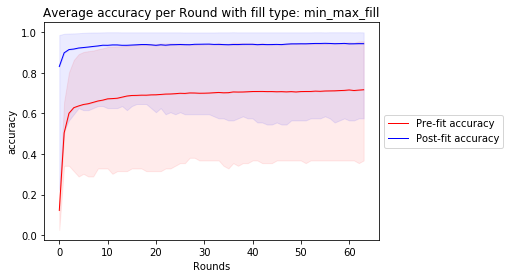

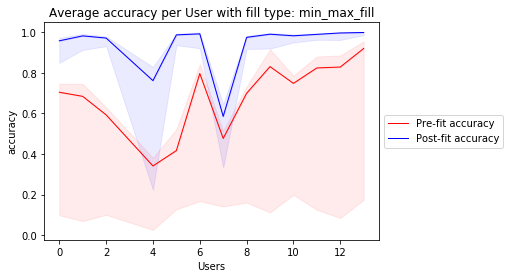

/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Std deviation
For central


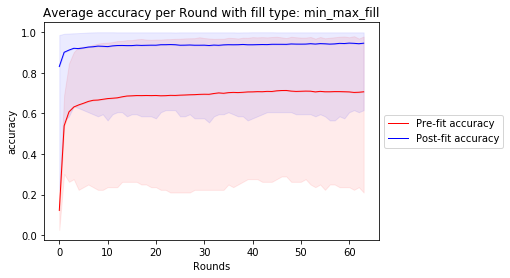

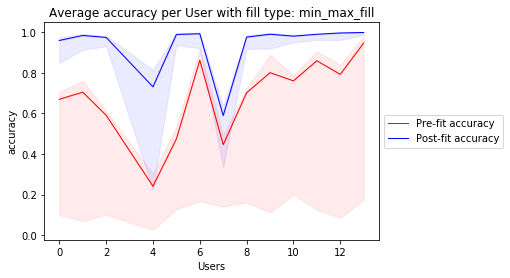

/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


For p2p


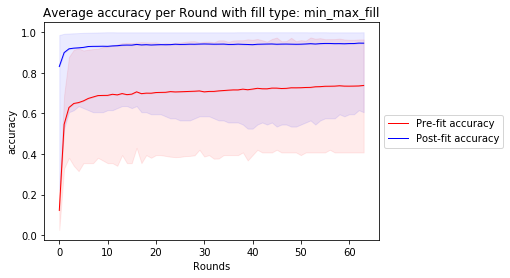

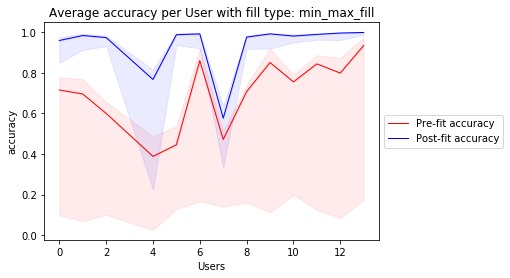

/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Weighted average
For central


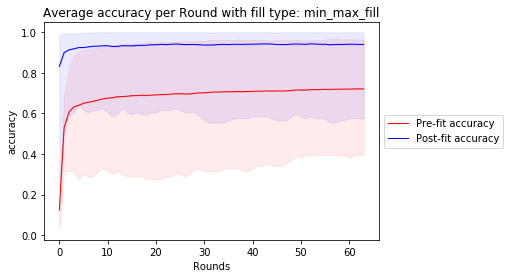

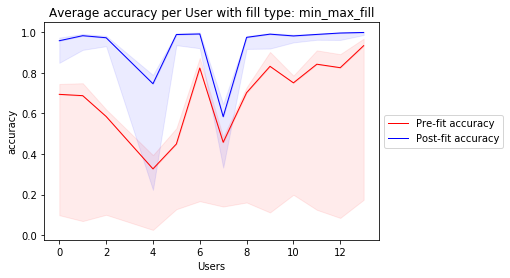

/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


For p2p


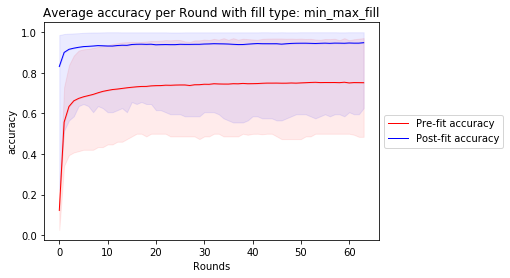

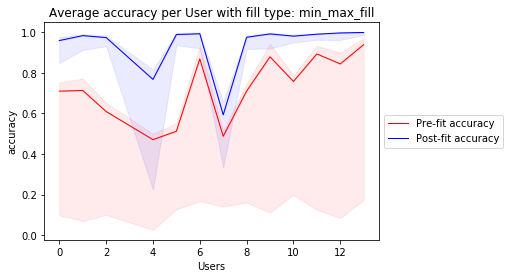

/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Local training only


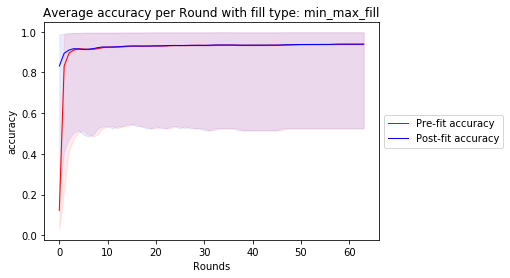

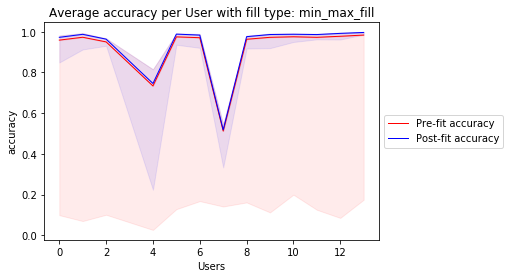

/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     Average   Maximum   Minimum Position Round  Standard Deviation  \
0   0.716838  0.955378  0.368421      Pre    63            0.183868   
1   0.943707  0.999428  0.575758     Post    63            0.116019   
2   0.706791  0.978833  0.210526      Pre    63            0.208049   
3   0.946044  0.999428  0.616162     Post    63            0.107668   
4   0.737929  0.964531  0.407895      Pre    63            0.169452   
5   0.946230  1.000000  0.606061     Post    63            0.110375   
6   0.720775  0.964531  0.394737      Pre    63            0.177703   
7   0.940065  0.999428  0.575758     Post    63            0.121357   
8   0.751480  0.971396  0.484848      Pre    63            0.168509   
9   0.948643  1.000000  0.626263     Post    63            0.104214   
10  0.939042  0.997712  0.525253      Pre    63            0.128118   
11  0.939044  0.997712  0.525253     Post    63            0.128133   

           Strategy  
0      centralround  
1      centralround  
2         

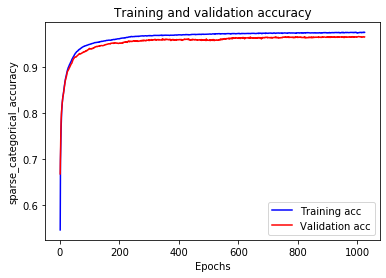

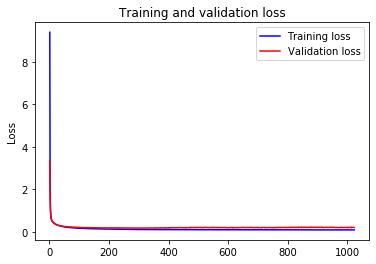

All
For central


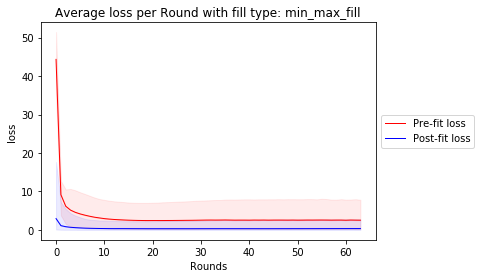

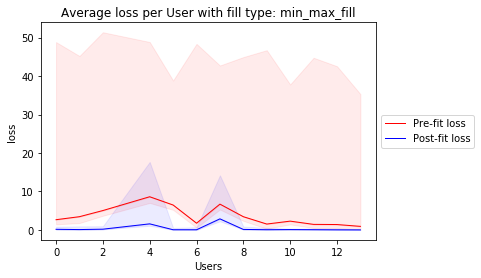

Std deviation
For central


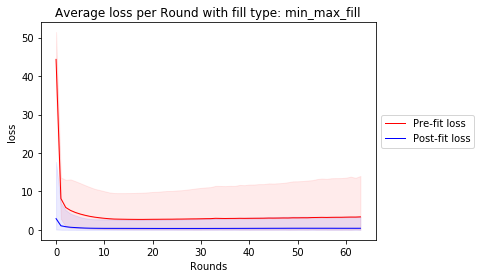

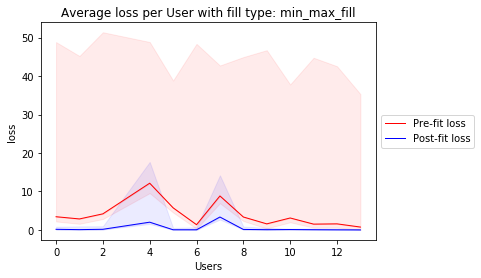

For p2p


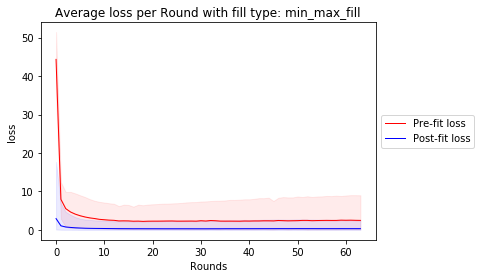

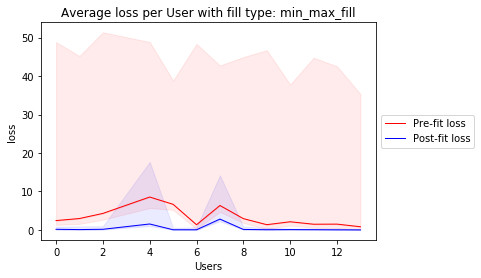

Weighted average
For central


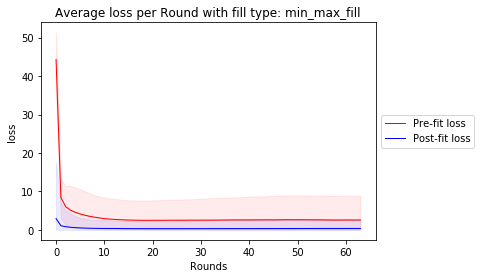

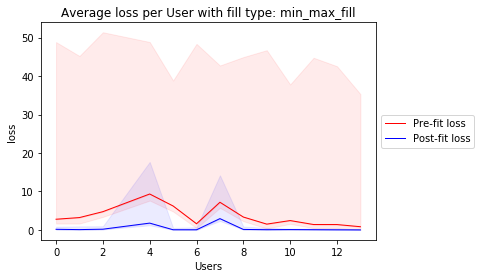

For p2p


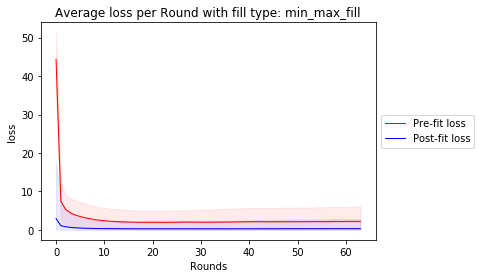

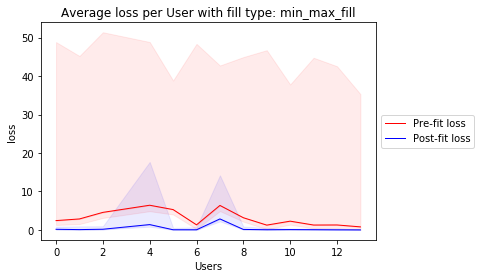

Local training only


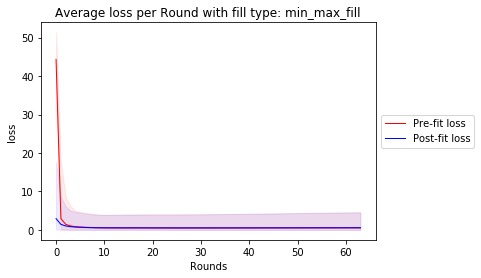

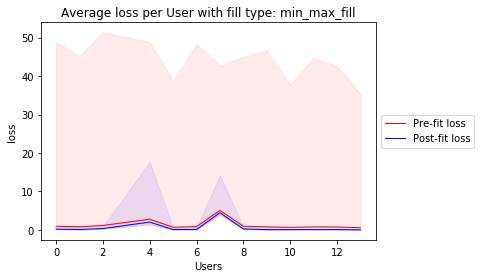

     Average    Maximum   Minimum Position Round  Standard Deviation  \
0   2.531397   7.840950  0.221129      Pre    63            2.435313   
1   0.354512   2.725256  0.000670     Post    63            0.765556   
2   3.396334  14.030103  0.070377      Pre    63            3.947367   
3   0.431111   3.442795  0.001143     Post    63            0.956497   
4   2.476926   9.011591  0.160646      Pre    63            2.567934   
5   0.330427   2.574359  0.000377     Post    63            0.713645   
6   2.582322   8.935053  0.152595      Pre    63            2.608641   
7   0.384441   2.787213  0.000523     Post    63            0.812599   
8   2.196616   6.132370  0.106152      Pre    63            2.051005   
9   0.335724   2.806439  0.000124     Post    63            0.758648   
10  0.580659   4.592092  0.013354      Pre    63            1.208942   
11  0.582047   4.606197  0.013264     Post    63            1.212338   

           Strategy  
0      centralround  
1      centralround

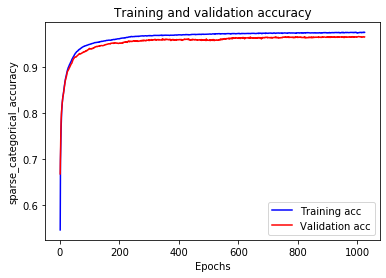

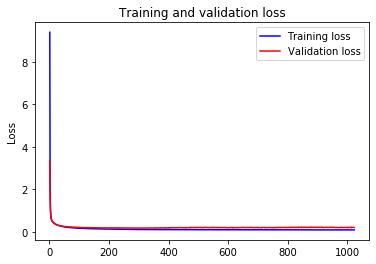

<Figure size 432x288 with 0 Axes>

In [6]:
    ignore_first_n = 0
    final_values = False
    MAJORITY_SPLIT="stdsplit"
    for GRAPHING_METRIC in ["accuracy", "loss"]:
        round_summary_df = pd.DataFrame(columns=['Strategy','Position', 'Round', 'Average', 'Standard Deviation', 'Minimum', 'Maximum'])
        user_summary_df = pd.DataFrame(columns=['Strategy', 'Position', 'User', 'Average', 'Standard Deviation', 'Minimum', 'Maximum', 'Final Value'])
        print("All")

        print("For central")


        df_avg_round_stats_acc = avg_round_stats(users_all, 
                                                 ignore_first_n = ignore_first_n, 
                                                 min_max_fill = True, 
                                                 metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"centralround-{MAJORITY_SPLIT}",
                                                 final_values = final_values)
        df_avg_user_stats_acc = avg_user_stats(users_all, 
                                               ignore_first_n = ignore_first_n, 
                                               min_max_fill = True, 
                                               metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"centraluser-{MAJORITY_SPLIT}",
                                               final_values = final_values)
        last_2 = df_avg_round_stats_acc[-2:]
        last_2["Strategy"] = "centralround"
        round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
        df_avg_user_stats_acc["Strategy"] = "centraluser"
        user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)
        print("Std deviation")
        print("For central")


        df_avg_round_stats_acc = avg_round_stats(users_std_dev, 
                                                 ignore_first_n = ignore_first_n, 
                                                 min_max_fill = True, 
                                                 metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stdround-{MAJORITY_SPLIT}",
                                                 final_values = final_values)
        df_avg_user_stats_acc = avg_user_stats(users_std_dev, 
                                               ignore_first_n = ignore_first_n, 
                                               min_max_fill = True, 
                                               metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stduser-{MAJORITY_SPLIT}",
                                               final_values = final_values)
        last_2 = df_avg_round_stats_acc[-2:]
        last_2["Strategy"] = "stdround"
        round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
        df_avg_user_stats_acc["Strategy"] = "stduser"
        user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)
        
        print("For p2p")
        
        df_avg_round_stats_acc = avg_round_stats(users_std_dev_p2p, 
                                                 ignore_first_n = ignore_first_n, 
                                                 min_max_fill = True, 
                                                 metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stdround_p2p-{MAJORITY_SPLIT}",
                                                 final_values = final_values)
        df_avg_user_stats_acc = avg_user_stats(users_std_dev_p2p, 
                                               ignore_first_n = ignore_first_n, 
                                               min_max_fill = True, 
                                               metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stduser_p2p-{MAJORITY_SPLIT}",
                                               final_values = final_values)
        last_2 = df_avg_round_stats_acc[-2:]
        last_2["Strategy"] = "stdround_p2p"
        round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
        df_avg_user_stats_acc["Strategy"] = "stduser_p2p"
        user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)


        print("Weighted average")

        print("For central")


        df_avg_round_stats_acc = avg_round_stats(users_weighted_avg, 
                                                 ignore_first_n = ignore_first_n, 
                                                 min_max_fill = True, 
                                                 metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightround-{MAJORITY_SPLIT}",
                                                 final_values = final_values)
        df_avg_user_stats_acc = avg_user_stats(users_weighted_avg, 
                                               ignore_first_n = ignore_first_n, 
                                               min_max_fill = True, 
                                               metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightuser-{MAJORITY_SPLIT}",
                                               final_values = final_values)
        last_2 = df_avg_round_stats_acc[-2:]
        last_2["Strategy"] = "weightround"
        round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
        df_avg_user_stats_acc["Strategy"] = "weightuser"
        user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)

        print("For p2p")


        df_avg_round_stats_acc = avg_round_stats(users_weighted_avg_p2p, 
                                                 ignore_first_n = ignore_first_n, 
                                                 min_max_fill = True, 
                                                 metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightround_p2p-{MAJORITY_SPLIT}",
                                                 final_values = final_values)
        df_avg_user_stats_acc = avg_user_stats(users_weighted_avg_p2p, 
                                               ignore_first_n = ignore_first_n, 
                                               min_max_fill = True, 
                                               metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightuser_p2p-{MAJORITY_SPLIT}",
                                               final_values = final_values)

        last_2 = df_avg_round_stats_acc[-2:]
        last_2["Strategy"] = "weightround_p2p"
        round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
        df_avg_user_stats_acc["Strategy"] = "weightuser_p2p"
        user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)


        print("Local training only")


        df_avg_round_stats_acc = avg_round_stats(users_local_only, 
                                                 ignore_first_n = ignore_first_n, 
                                                 min_max_fill = True, 
                                                 metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"localround-{MAJORITY_SPLIT}",
                                                 final_values = final_values)
        df_avg_user_stats_acc = avg_user_stats(users_local_only, 
                                               ignore_first_n = ignore_first_n, 
                                               min_max_fill = True, 
                                               metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"localuser-{MAJORITY_SPLIT}",
                                               final_values = final_values)
        # draw_graphs(users_all_p2p[2])
        last_2 = df_avg_round_stats_acc[-2:]
        last_2["Strategy"] = "localround"
        round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
        df_avg_user_stats_acc["Strategy"] = "localuser"
        user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)

        print(round_summary_df)
        round_summary_df.to_csv(os.path.join(OUT_PATH,f'summary-rounds-{GRAPHING_METRIC}-{MAJORITY_SPLIT}.csv')) 
        user_summary_df.to_csv(os.path.join(OUT_PATH,f'summary-users-{GRAPHING_METRIC}-{MAJORITY_SPLIT}.csv')) 

        draw_graphs(global_user, path= OUT_PATH, save_as=f"global_{MAJORITY_SPLIT}")
        with open(os.path.join(OUT_PATH,f"{GRAPHING_METRIC}-{MAJORITY_SPLIT}.csv"), "w") as out:
            strats = [users_local_only, users_all, users_std_dev, users_std_dev_p2p, users_weighted_avg, users_weighted_avg_p2p]
            strats_names = ["Local only", "All (traditional)", "Std dev Central", "Std dev P2P", "Weighted avg Central", "Weighted avg P2P"]
            g_weights = global_user.get_weights()
            out.write("Testing user models (post fit) on global model aggregate data,\n")
            e = global_user.evaluate(verbose=False)
            out.write(f"{GRAPHING_METRIC}-globaluser,{e[0]},{e[1]},\n")
        #     print(global_user.evaluate(verbose=False))

            for i, strat in enumerate(strats):
        #         print(strats_names[i])
                out.write(strats_names[i]+",\n")
                for user in strat.values():
                    global_user.set_weights(user.get_weights())
                    e = global_user.evaluate(verbose=False)
                    out.write(f"{GRAPHING_METRIC}-user-{user.get_id()}:,{e[0]},{e[1]},\n")
        #             print(f"{GRAPHING_METRIC}-{user.get_id()}: {e}")